# Exploratory Data Analysis
## *Bingying (Echo) Liu*

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

I searched through web and found a data set about **"Ultimate Halloween Candy Power Ranking"** (https://www.kaggle.com/fivethirtyeight/the-ultimate-halloween-candy-power-ranking), which is very interesting to me and to all those who would like to make their house the most popular in neighborhood during Halloween season. We want to find out **what are the best Halloween candies to stockpile** and also **what make those candies so popular**. According to the kaggle data description, this data set is collected "by creating a website where participants were shown presenting two fun-sized candies and asked to click on the one they would prefer to receive." There are about 269 thousand votes collected.

First, let's take a look at the candy data set.

In [110]:
candy_data = pd.read_csv('candy-data.csv')

In [3]:
candy_data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


**"competitorname"** refers to brands and names of the candy. <br>
**"Chocolate, fruity, caramel, peanutyalmondy, nougat, crispedricewafer, hard, bar, pluribus"** are ingredients/attributes of candy with value 1 for contain/true and 0 for not contain/false. Pluribus refers to whether a candy is in a bag or box.<br>
**"sugarpercent"** refers to the percentile of sugar this candy falls under within the data set.<br>
**"pricepercent"** refers to the percentile of price it falls under within the data set.<br>
**"winpercent"** refers to the overall win percentage according to 269,000 matchups.

Let's also take a look at the overall summary of the data set.

In [4]:
candy_data.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


We can see that there are in total 85 different candies entered this competition. 43.5% of times, we encounter chocolate candies and 44.7% of times, we come across fruity candies. And it seems like those two conitions are very much mutually exclusive.

Let's then check if there is any missing or erroneous value in the candy dataset. We use pandas.isna function to get a boolean matrix showing whether each of the entry in original dataset is na/null (True) or contains value (False). We then use column sum to add up all boolean values, the result we have below are all zeros, which means there is no missing value in the data set. The data itself is clean.

In [29]:
if_null = pd.isna(candy_data)
if_null.sum(axis=0)

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

Let's **sort the data set** and find the ten most popular candies. Reeses take 4 positions of the top ten spots and if we look at the ingredients carefully, top ten all contain chocolate and are not hard candies. This might give us some insight into why they're so desirable.

In [112]:
(candy_data.sort_values(by = 'winpercent', ascending = False)).head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
52,ReeseÕs Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290
51,ReeseÕs Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257
79,Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914
28,Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600
64,Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782
53,ReeseÕs pieces,1,0,0,1,0,0,0,0,1,0.406,0.651,73.434990
36,Milky Way,1,0,1,0,1,0,0,1,0,0.604,0.651,73.099556
54,ReeseÕs stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,72.887901
32,Peanut butter M&MÕs,1,0,0,1,0,0,0,0,1,0.825,0.651,71.465050
42,Nestle Butterfinger,1,0,0,1,0,0,0,1,0,0.604,0.767,70.735641


Let's **create a color heatmap** for the correlation between all variables. This also shows some interesting insights. Attribute winpercent has a relatively high correlation with chocolate, peanutyalmondy, crispedricewafer, bar and pricepercent. If we were to create a unicorn candy liked by everyone, it seems that we should take them all into considerations. But correlation doesn't imply causation.

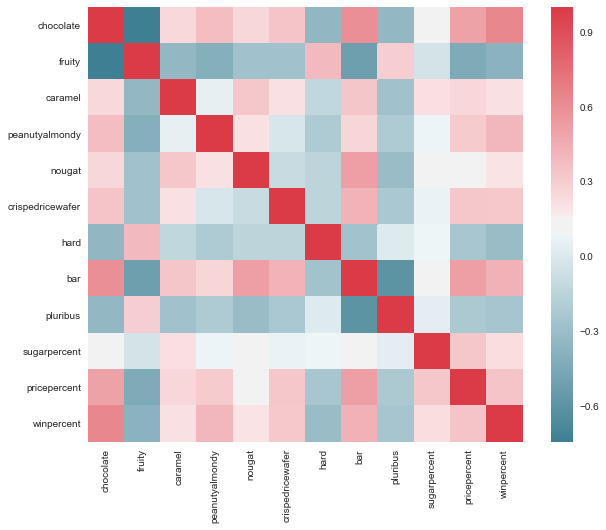

In [79]:
f, ax = plt.subplots(figsize=(10, 8))
corr = candy_data.iloc[:, 1:13].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [51]:
corr

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
chocolate,1.000000,-0.741721,0.249875,0.377824,0.254892,0.341210,-0.344177,0.597421,-0.339675,0.104169,0.504675,0.636517
fruity,-0.741721,1.000000,-0.335485,-0.399280,-0.269367,-0.269367,0.390678,-0.515066,0.299725,-0.034393,-0.430969,-0.380938
caramel,0.249875,-0.335485,1.000000,0.059356,0.328493,0.213113,-0.122355,0.333960,-0.269585,0.221933,0.254327,0.213416
peanutyalmondy,0.377824,-0.399280,0.059356,1.000000,0.213113,-0.017646,-0.205557,0.260420,-0.206109,0.087889,0.309153,0.406192
nougat,0.254892,-0.269367,0.328493,0.213113,1.000000,-0.089744,-0.138675,0.522976,-0.310339,0.123081,0.153196,0.199375
crispedricewafer,0.341210,-0.269367,0.213113,-0.017646,-0.089744,1.000000,-0.138675,0.423751,-0.224693,0.069950,0.328265,0.324680
hard,-0.344177,0.390678,-0.122355,-0.205557,-0.138675,-0.138675,1.000000,-0.265165,0.014532,0.091810,-0.244365,-0.310382
bar,0.597421,-0.515066,0.333960,0.260420,0.522976,0.423751,-0.265165,1.000000,-0.593409,0.099985,0.518407,0.429929
pluribus,-0.339675,0.299725,-0.269585,-0.206109,-0.310339,-0.224693,0.014532,-0.593409,1.000000,0.045523,-0.220794,-0.247448
sugarpercent,0.104169,-0.034393,0.221933,0.087889,0.123081,0.069950,0.091810,0.099985,0.045523,1.000000,0.329706,0.229151


Finally, let's create **scatterplots for continuous variables** such as sugarprecent and pricepercent as well as **boxplots for discrete variables** which are ingredients/attributes of the candy. Those exploratory plots will help us to determine if multiple regressions are possible and if transformations of some variables are needed. There seem to be slight positive linear relationship between winpercent and sugarpercent/pricepercent. Box width of not hard seems to be one half of width of hard candies, which means their variances are very different and might cause trouble for regression since underlying data might not be normal. We can also see that adding caramel, peautyalmondy, nougat, crispedricewafer all contribute to the winning percentage (but they seems to co-ocur with chocoloate instead of fruity candies.

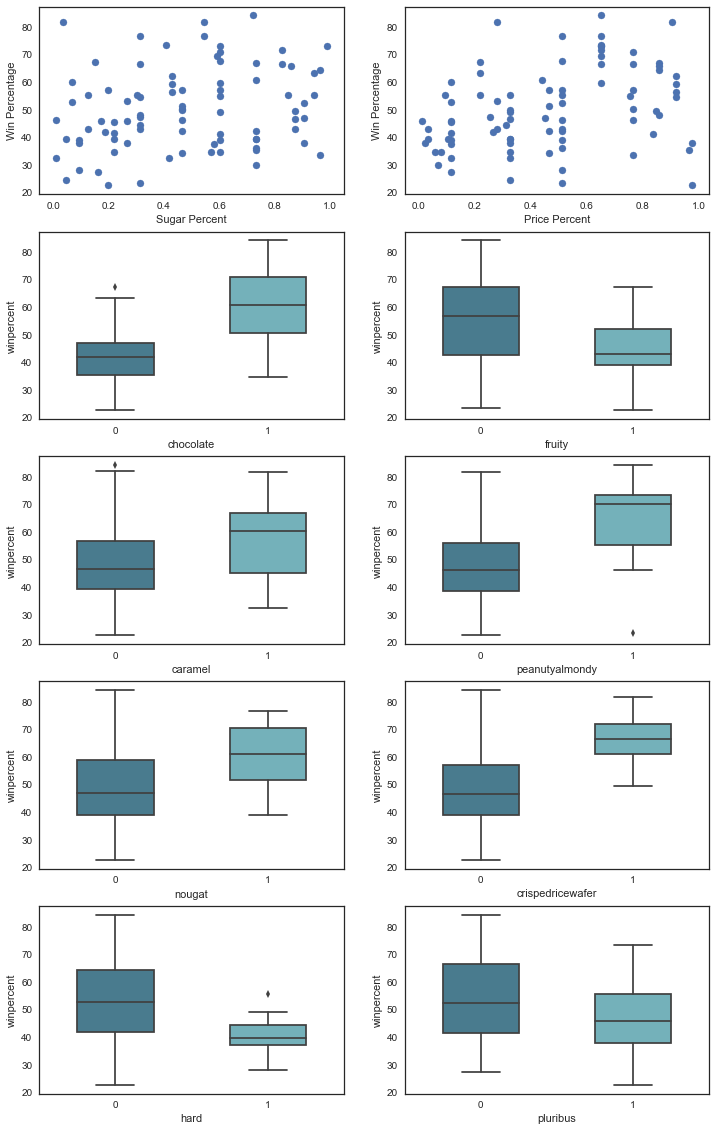

In [108]:
plt.figure(figsize=(12,20))
ax = plt.subplot(5,2,1)
ax.scatter(x = candy_data.iloc[:, 10], y = candy_data.iloc[:, 12])
ax.set_xlabel('Sugar Percent')
ax.set_ylabel('Win Percentage')

ax = plt.subplot(5,2,2)
ax.scatter(x = candy_data.iloc[:, 11], y = candy_data.iloc[:, 12])
ax.set_xlabel('Price Percent')
ax.set_ylabel('Win Percentage')

ax = plt.subplot(5,2,3)
bplot1 = sns.boxplot(y='winpercent', x='chocolate', 
                 data=candy_data, 
                 width=0.5, palette="GnBu_d")

ax = plt.subplot(5,2,4)
bplot2 = sns.boxplot(y='winpercent', x='fruity', 
                 data=candy_data, 
                 width=0.5, palette="GnBu_d")

ax = plt.subplot(5,2,5)
bplot3 = sns.boxplot(y='winpercent', x='caramel', 
                 data=candy_data, 
                 width=0.5, palette="GnBu_d")

ax = plt.subplot(5,2,6)
bplot4 = sns.boxplot(y='winpercent', x='peanutyalmondy', 
                 data=candy_data, 
                 width=0.5, palette="GnBu_d")

ax = plt.subplot(5,2,7)
bplot5 = sns.boxplot(y='winpercent', x='nougat', 
                 data=candy_data, 
                 width=0.5, palette="GnBu_d")

ax = plt.subplot(5,2,8)
bplot6 = sns.boxplot(y='winpercent', x='crispedricewafer', 
                 data=candy_data, 
                 width=0.5, palette="GnBu_d")

ax = plt.subplot(5,2,9)
bplot7 = sns.boxplot(y='winpercent', x='hard', 
                 data=candy_data, 
                 width=0.5, palette="GnBu_d")

ax = plt.subplot(5,2,10)
bplot8 = sns.boxplot(y='winpercent', x='pluribus', 
                 data=candy_data, 
                 width=0.5, palette="GnBu_d")